<a href="https://colab.research.google.com/github/13enny/WMU-102-/blob/main/WMU_102_Star_Galaxy_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Info

WMU 102 - Makers@USM 

Group Project: Star/Galaxy Classifier

Group Members: Benny Tan, Chan Jun Wei, Chow Wen Iou


# Introduction


Stars and galaxies are obviously two different stellar objects, however under the naked eye, faraway stars and galaxies look similar as they begin to become point sources. A simple example would be to take the Sun and the Milky Way and put them at a very, very far location. At some point, they would both look like a single bright dot and become indistinguishable. Some of the methods used to distinguish them are spectroscopy and photometry.

In general, spectroscopy is the measurement of intensity at each wavelength across the entire electromagnetic spectrum. And photometry is performed by measuring the flux or intensity of radiating objects as seen from the human eye using a telescope and photometer.

There are three commonly known types of spectroscopy,

1. Continuum spectrum: Radiation spectrum obtained directly from the stellar object.
2. Absorption spectrum: The stellar object is blocked by a interstellar cloud, and photons in the cloud absorb energy from the radiation. Thus producing some low intensities for particular wavelengths.
3. Emission spectrum: The spectrum is obtained by observing the interstellar cloud, hence sharp peaks of particular wavelengths are detected.

Stars are singular objects of light which usually are easily identified from their absorption spectrum, whereas galaxies are clusters of stars and other radiating matter in the galaxy. Hence, the spectrums of galaxies are usually more complicated.

With the advancement of technology, the information obtained and derived from spectroscopy and photometry can be utilised to produce good datasets suitable for machine learning (ML). And the aim of this project is to determine a suitable ML model that **can accurately classify between stars and galaxies**.

# Data


In [ ]:
#First we import the libraries needed
import pandas as pd
import pandas_profiling
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Here we begin the first step our project, uploading the dataset that we had obtained from SDSS website.
from google.colab import files
uploaded = files.upload()

Saving star_galaxy.csv to star_galaxy (1).csv


In [ ]:
#Giving a name to our dataset, the naming is completely arbitary.
df = pd.read_csv('star_galaxy.csv')

#Let's take a first glance to our dataset
df

,objID,ra,dec,lnLExp_r,lnLDev_r,deVMag_r,expMag_r,modelMag_r,cModelMag_r,deVAB_r,deVRad_i,expRad_i,petroR50_i,petroR90_i,new class
0,1237658629695078502,186.387613,12.260543,-3161.775000,-12036.47000,14.45502,14.09242,14.09242,14.09242,0.474484,29.668200,30.699290,15.296520,33.239020,0
1,1237661060647617165,49.402127,42.750376,-41.851900,-30.71809,18.53920,18.55011,18.53920,18.53920,0.050000,0.358142,0.456169,0.585767,1.336669,0
2,1237671123767263327,150.322046,14.127760,-1204.695000,-1203.99300,14.18365,14.18373,14.18365,14.18365,0.399961,0.039652,0.046137,0.625252,1.430240,0
3,1237651252060422933,259.905270,30.608391,-200.335200,-785.46720,16.66635,17.04451,17.04450,16.92419,0.391293,5.907728,2.942853,2.474750,6.142283,0
4,1237654652572008582,146.815009,53.493186,-611.635000,-41.07962,17.48758,17.82490,17.48758,17.48758,0.847347,1.636425,1.031812,1.992710,6.437787,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15087,1237668294982369408,166.097260,19.917108,-4552.392000,-1187.47900,14.84017,15.33469,14.84017,15.00922,0.723480,12.232070,5.306878,5.691949,16.220020,1
15088,1237668625161453608,188.644747,18.202675,-3484.692000,-23600.52000,12.78224,12.58221,12.58222,12.61800,0.515024,29.668420,23.654630,20.009930,55.607660,1
15089,1237674604291162452,215.627979,-1.229203,-15.255700,-258.41580,16.63208,16.67247,16.67246,16.67247,0.299545,29.675350,10.840930,6.918785,15.467980,1
15090,1237654606410220043,184.675718,5.665423,-1.583351,-200.32720,16.43691,17.22947,17.22947,17.22947,0.556414,27.459160,7.901566,5.713967,12.268810,1


This dataset is obtained from the Sloan Digital Sky Survey database. http://cas.sdss.org/dr8/en/

In order to let the readers have a better understanding of what we are doing, we will explain each variables briefly. 
1. objID: object ID
2. ra: right ascension (coordinate on sky)
3. dec: declination (coordinate on sky)
4. lnLExp_r:  exponential disk fit in natural logarithm of likelihood function in r band 
5. lnLDev_r: de Vaucouleurs fit in natural logarithm of likelihood function in r band 
6. devMag_r: de Vaucouleurs magnitude fit 
(description of brightness profile of elliptical galaxy)
7. expMag_r: exponential fit
(description of brightness profile of disc galaxy)
8. modelMag: better of deV/Exp magnitude fit
9. cModelMag: composite model magnitude
10. deVAB_i: de Vaucouleurs fit of axis ratio
(morphological parameter of stellar objects)
11. deVRad_i: de Vaucouleurs fit scale radius
(morphological parameter of stellar objects)
12. expRad_i: exponential fit scale radius
(morphological parameter of stellar objects)
13. petroR50: radius containing 50% of Petrosian flux
(description of brightness of stellar object)
14. petroR90: radius containing 90% of Petrosian flux
(description of brightness of stellar object)
15. new class: 0 = galaxy, 1 = star

*Readers can refer to https://www.sdss.org/dr15/algorithms/magnitudes/ for further reading

In [ ]:
#Next we check if there is any null value in the dataset, remove any if needed.
print(pd.isnull(df).sum())

objID          0
ra             0
dec            0
lnLExp_r       0
lnLDev_r       0
deVMag_r       0
expMag_r       0
modelMag_r     0
cModelMag_r    0
deVAB_r        0
deVRad_i       0
expRad_i       0
petroR50_i     0
petroR90_i     0
new class      0
dtype: int64


No null value was found, so no further actions needed.

In [ ]:
#Next we determine the variables to be used in the training set.
X= df.drop(['objID', 'ra', 'dec', 'modelMag_r', 'cModelMag_r', 'new class'],axis = 1)
Y= df["new class"]

Finally, we determine which column to be discarded in order to reduce the number of variables in training so that better result could be obtained.

Generally, we want:
1. The variables that can truely reflect the characteristics of the stars or galaxies.
2. Minimum number of variables to maximise the efficiency of the training and also to prevent the curse of dimensionality 

In this case, we decided to drop objID, ra, dec, modelMag_r, cModelMag_r, we will further discuss the reasons we chose to drop them.

1. objID: It is the values that was assigned for the numbering of the stellar objects, it has nothing to do with the characteristics of the stars or galaxies.
2. ra,dec: It is the values that reflects the coordinates of the stellar objects in sky. Since our Universe is assumed to be isotropy, there should not have bias location of a certain stellar objects (it should be completely random). 
3. modelMag and CModelMag: They are the best fit of the other two parameters. They are intercorrelated with the other variables hence they will be redundant. Dropping them can increase the efficiency of the code to run and increase the performance of algorithm with lesser dimension involved.

Until this step, we have done the data cleaning step for this project. We will proceed to the phase which is the application of machine learning algorithm.

# Supervised Learning Models

In [ ]:
# Split train/test datasets

from sklearn.model_selection import train_test_split

train_X, test_X, train_Y, test_Y = train_test_split(X, Y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=122)

In [ ]:
# Import classification tools

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

import warnings
from sklearn.exceptions import FitFailedWarning
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action = 'ignore', category = FutureWarning) 
warnings.simplefilter(action = "ignore", category = ConvergenceWarning)
warnings.simplefilter(action = "ignore", category = UserWarning)
warnings.simplefilter(action = "ignore", category = FitFailedWarning)

**K-Nearest Neighbors (KNN)**

KNN algorithm asuumes similarity between the new available data and put the new data into the category that is most similar to the available categories

This algorithm select *k* number of neighbors and calculate the euclidean distance between them. Among these *k* neighbors, the distance to the data point in each category is counted and the category of the new data point is assigned based on the maximum number of neighbors.

Advantages

1. Simple to implement.
2. Robust to noisy training data.

Disadvantages

1. Need to determine the appropriate value of *k*.
2. Computation cost is high when calculating the distance between the data points for all the training sample.

In [ ]:
# Determine optimum N value

import math

print('Since the length of train_Y is {0}'.format(len(train_Y)))
print('And the root is {0}'.format(math.sqrt(len(train_Y))))
print('Hence, we choose n = {0}'.format(int(math.sqrt(len(train_Y)))))

Since the length of train_Y is 12073
And the root is 109.87720418721983
Hence, we choose n = 109


K-Nearest Neighbors
---------------------
Train accuracy = 0.824
Test accuracy  = 0.820
F1 score       = 0.829

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1441
           1       0.82      0.84      0.83      1578

    accuracy                           0.82      3019
   macro avg       0.82      0.82      0.82      3019
weighted avg       0.82      0.82      0.82      3019


Confusion Matrix


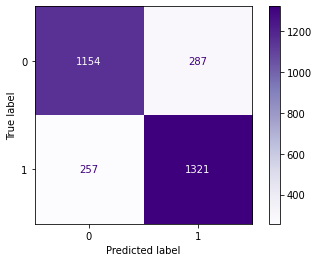

In [ ]:
# Define the model

from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier(n_neighbors = int(math.sqrt(len(train_Y))), p = 2, metric= 'euclidean')
knn.fit(train_X,train_Y)

# Prediction, accuracy and F1 score

Y_pred_knn = knn.predict(test_X)

print('K-Nearest Neighbors')
print('---------------------')
print('Train accuracy = {:.3f}'.format(knn.score(train_X, train_Y)))
print('Test accuracy  = {:.3f}'.format(accuracy_score(test_Y, Y_pred_knn)))
print('F1 score       = {:.3f}'.format(f1_score(test_Y,Y_pred_knn)))

# Classification report

print('\nClassification Report')
print(classification_report(test_Y, Y_pred_knn))

# Confusion matrix

print('\nConfusion Matrix')
ConfusionMatrixDisplay.from_estimator(knn, test_X, test_Y, cmap = 'Purples')
plt.show()

**Naive-Bayes Classifier**

A classification technique based on Bayes theorem with an assumption of independance among predictors.(ie. assumes that the presence of a particular feature in aclass is unrelated to the presence of other feature).

Advantages

1. When assumption of independance hold,performs better than logistic regression and need less training data.
2. Performs well in case of categorical input variables.

Disadvantages

1. In real life, sets of predictors which are completely independent are impossible.

Gaussian Naive-Bayes Classifier
---------------------------------
Train accuracy = 0.931
Test accuracy  = 0.930
F1 score       = 0.931

Classification Report
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1441
           1       0.96      0.91      0.93      1578

    accuracy                           0.93      3019
   macro avg       0.93      0.93      0.93      3019
weighted avg       0.93      0.93      0.93      3019


Confusion Matrix


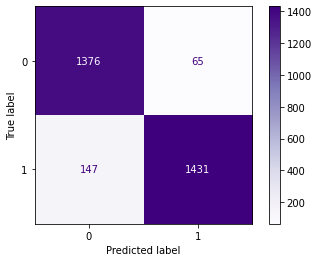

In [ ]:
# Fitting Naive Bayes to the training set

from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(train_X,train_Y)

# Predicting the test set results, accuracy and F1 score

Y_pred_gnb = gnb.predict(test_X)

print('Gaussian Naive-Bayes Classifier')
print('---------------------------------')
print('Train accuracy = {:.3f}'.format(gnb.score(train_X, train_Y)))
print('Test accuracy  = {:.3f}'.format(accuracy_score(test_Y, Y_pred_gnb)))
print('F1 score       = {:.3f}'.format(f1_score(test_Y,Y_pred_gnb)))

# Classification report

print('\nClassification Report')
print(classification_report(test_Y, Y_pred_gnb))

# Making the confusion matrix

print('\nConfusion Matrix')
ConfusionMatrixDisplay.from_estimator(gnb, test_X, test_Y, cmap = 'Purples')
plt.show()

**Logistic Regression**

A classification algorithm used to find the probability of event success and event failure. It is used when the dependent variable is binary (0/1, True/False, Yes/No) in nature. It supports categorizing data into discrete classes by studying relationship from a given set of data.

Advantages

1. Performs well when dataset is linearly separable very fast at classifying unknown records.

Disadvantages 

1. Assumes linearity between dependent and independent variables can only be used to predict discrete functions.


Logistic Regression
---------------------
Train accuracy = 0.951
Test accuracy  = 0.943
F1 score       = 0.945

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1441
           1       0.95      0.94      0.94      1578

    accuracy                           0.94      3019
   macro avg       0.94      0.94      0.94      3019
weighted avg       0.94      0.94      0.94      3019


Confusion Matrix


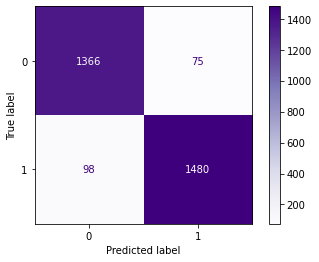

In [ ]:
# Fitting logistic regression into training set

from sklearn.linear_model import LogisticRegression

logModel = LogisticRegression(max_iter = 1000)
logModel.fit(train_X, train_Y)

# Predicting test results, accuracy and F1 score

Y_pred_logModel = logModel.predict(test_X)

print('Logistic Regression')
print('---------------------')
print('Train accuracy = {:.3f}'.format(logModel.score(train_X, train_Y)))
print('Test accuracy  = {:.3f}'.format(accuracy_score(test_Y, Y_pred_logModel)))
print('F1 score       = {:.3f}'.format(f1_score(test_Y,Y_pred_logModel)))

# Classification report

print('\nClassification Report')
print(classification_report(test_Y, Y_pred_logModel))

# Making the confusion matrix

print('\nConfusion Matrix')
ConfusionMatrixDisplay.from_estimator(logModel, test_X, test_Y, cmap = 'Purples')
plt.show()

**Support Vector Machine (SVM)**

The SVM algorithm seeks to find a hyperplane in N-dimensions with maximum margin between data points, such that it can clearly classify the new data. The hyperplane itself can be a flat plane or warped around the data points.

Advantages: 
1. Effective when dealing with a small amount of data sets against a large number of dimensions.
2. Effective when data is well-defined and has little or no overlapping.

Disadvantages:
1. Requires data that do not overlap (clear distinction).

Best parameters: 
{'C': 2, 'degree': 1, 'gamma': 'auto', 'kernel': 'rbf'}

Support Vector Machine
---------------------------
Train accuracy = 0.999
Test accuracy  = 0.768
F1 score       = 0.719

Classification Report
              precision    recall  f1-score   support

           0       0.68      0.99      0.80      1441
           1       0.98      0.57      0.72      1578

    accuracy                           0.77      3019
   macro avg       0.83      0.78      0.76      3019
weighted avg       0.84      0.77      0.76      3019


Confusion Matrix


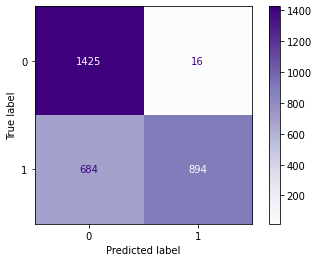

In [ ]:
# Support vector classification (SVC)

from sklearn.svm import SVC

params = {'C' : range(1, 5), 'kernel' : ['rbf'], 'degree' : range(1, 5), 'gamma' : ['scale', 'auto']}

grid_search = GridSearchCV(SVC(), params, n_jobs = -1)
grid_search.fit(train_X, train_Y.ravel())
print('Best parameters: \n{0}'.format(grid_search.best_params_))

svc = SVC(**grid_search.best_params_, random_state = 0)
svc.fit(train_X, train_Y.ravel())

# Predictions, accuracy and F1 score

Y_pred_svc = svc.predict(test_X)

print('\nSupport Vector Machine')
print('---------------------------')
print('Train accuracy = {:.3f}'.format(svc.score(train_X, train_Y)))
print('Test accuracy  = {:.3f}'.format(accuracy_score(test_Y, Y_pred_svc)))
print('F1 score       = {:.3f}'.format(f1_score(test_Y,Y_pred_svc)))

# Classification report

print('\nClassification Report')
print(classification_report(test_Y, Y_pred_svc))

# Confusion matrix

print('\nConfusion Matrix')
ConfusionMatrixDisplay.from_estimator(svc, test_X, test_Y, cmap = 'Purples')
plt.show()

**Decision Tree**

A machine learning tool that attempts to split the features into yes/no decisions, such that the final classes can be isolated.

Advantages:
1. Simple to understand and visualize.
2. Does not require much data preprocessing.

Disadvantages:
1. Can create over-complex trees. (Over-fitting of data)
2. Possible to produce biased results, if data is not balanced.

Best parameters: 
{'max_depth': 10, 'max_features': 5, 'min_samples_leaf': 5, 'min_samples_split': 10}

Decision Tree
---------------
Train accuracy = 0.978
Test accuracy  = 0.961
F1 score       = 0.963

Classification Report
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1441
           1       0.97      0.95      0.96      1578

    accuracy                           0.96      3019
   macro avg       0.96      0.96      0.96      3019
weighted avg       0.96      0.96      0.96      3019


Confusion Matrix


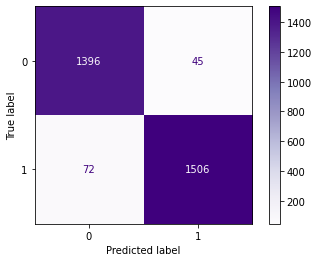

In [ ]:
from sklearn.tree import DecisionTreeClassifier

params = {'max_depth': [None, 10, 20], 
          'max_features': [None, 5, 10],
          'min_samples_leaf': [1, 3, 5],
          'min_samples_split': [2, 6, 10]}

grid_search = GridSearchCV(DecisionTreeClassifier(), params, n_jobs = -1)
grid_search.fit(train_X, train_Y.ravel())
print('Best parameters: \n{0}'.format(grid_search.best_params_))

dt = DecisionTreeClassifier(**grid_search.best_params_)
dt.fit(train_X, train_Y.ravel())

# Predictions, accuracy and F1 score

Y_pred_dt = dt.predict(test_X)

print('\nDecision Tree')
print('---------------')
print('Train accuracy = {:.3f}'.format(dt.score(train_X, train_Y)))
print('Test accuracy  = {:.3f}'.format(accuracy_score(test_Y, Y_pred_dt)))
print('F1 score       = {:.3f}'.format(f1_score(test_Y,Y_pred_dt)))

# Classification report

print('\nClassification Report')
print(classification_report(test_Y, Y_pred_dt))

# Confusion matrix 

print('\nConfusion Matrix')
ConfusionMatrixDisplay.from_estimator(dt, test_X, test_Y, cmap = 'Purples')
plt.show()

**Random Forest**

In general, the random forest classifier uses the same logic as a decision tree across several sub-samples of the dataset and averages the results obtained to improve prediction accuracy and control over-fitting.

Advantages:
1. Able to handle missing data by substitution of a variable appearing the most in a particular node.
2. Can process large amounts of data at a faster rate.

Best parameters: 
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 1000}

Random Forest
---------------
Train accuracy = 0.993
Test accuracy  = 0.972
F1 score       = 0.973

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1441
           1       0.98      0.97      0.97      1578

    accuracy                           0.97      3019
   macro avg       0.97      0.97      0.97      3019
weighted avg       0.97      0.97      0.97      3019


Confusion Matrix


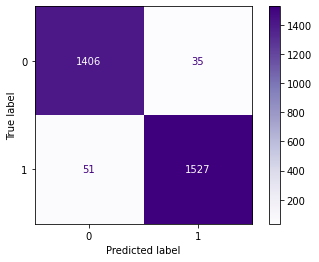

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

params = {'max_depth': [None, 10], 
          'max_features': [None, 10],
          'min_samples_leaf': [1, 5],
          'min_samples_split': [2, 10],
          'n_estimators': [1000]}

grid_search = GridSearchCV(RandomForestClassifier(), params, n_jobs = -1)
grid_search.fit(train_X, train_Y.ravel())
print('Best parameters: \n{0}'.format(grid_search.best_params_))

rf = RandomForestClassifier(**grid_search.best_params_, n_jobs = -1)
rf.fit(train_X, train_Y.ravel())

# Predictions, accuracy, F1 score

Y_pred_rf = rf.predict(test_X)

print('\nRandom Forest')
print('---------------')
print('Train accuracy = {:.3f}'.format(rf.score(train_X, train_Y)))
print('Test accuracy  = {:.3f}'.format(accuracy_score(test_Y, Y_pred_rf)))
print('F1 score       = {:.3f}'.format(f1_score(test_Y,Y_pred_rf)))

# Classification report

print('\nClassification Report')
print(classification_report(test_Y, Y_pred_rf))

# Confusion matrix

print('\nConfusion Matrix')
ConfusionMatrixDisplay.from_estimator(rf, test_X, test_Y, cmap = 'Purples')
plt.show()

**Multi-Layered Perceptron Classifier**

A type of artificial neural network (ANN) that comprises of at least three layers of nodes (input, hidden and output layer).

Advantages:
1. Can work with both single and multiple target values regression.

Disadvantages:
1. Unable to fine-tune parameters for each layer.

Best parameters: 
{'activation': 'logistic', 'learning_rate': 'adaptive'}

MLP Classifier
----------------
Train accuracy = 0.961
Test accuracy  = 0.957
F1 score       = 0.958

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      1441
           1       0.98      0.94      0.96      1578

    accuracy                           0.96      3019
   macro avg       0.96      0.96      0.96      3019
weighted avg       0.96      0.96      0.96      3019


Confusion Matrix


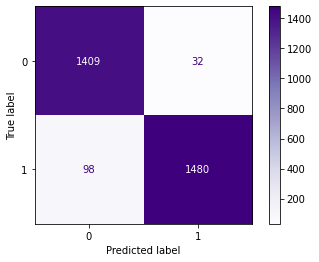

In [ ]:
# Multi-Layered perceptron classifier

from sklearn.neural_network import MLPClassifier

params = {'activation': ['identity', 'logistic', 'tanh', 'relu'], 
          'learning_rate': ['constant', 'invscaling', 'adaptive']}

grid_search = GridSearchCV(MLPClassifier(), params, n_jobs = -1)
grid_search.fit(train_X, train_Y.ravel())
print('Best parameters: \n{0}'.format(grid_search.best_params_))

mlp = MLPClassifier(**grid_search.best_params_)
mlp.fit(train_X, train_Y.ravel())

# Prediction, accuracy, f1 score

Y_pred_mlp = mlp.predict(test_X)

print('\nMLP Classifier')
print('----------------')
print('Train accuracy = {:.3f}'.format(mlp.score(train_X, train_Y)))
print('Test accuracy  = {:.3f}'.format(accuracy_score(test_Y, Y_pred_mlp)))
print('F1 score       = {:.3f}'.format(f1_score(test_Y,Y_pred_mlp)))

# Classification report

print('\nClassification Report')
print(classification_report(test_Y, Y_pred_mlp))

# Confusion matrix

print('\nConfusion Matrix')
ConfusionMatrixDisplay.from_estimator(mlp, test_X, test_Y, cmap = 'Purples')
plt.show()

Comparison of Models (Accuracy)

Accuracy is a measure of metric from the confusion matrix that tells us the **ratio of correctly predicted (TP + TN) data from the entire dataset**.

> $Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$

In [ ]:
# Accuracy

df_accuracy = pd.DataFrame({'Models': ['K-Nearest Neighbors', 
                                       'Gaussian Naive Bayes', 
                                       'Logistic Regression', 
                                       'Support Vector Machine', 
                                       'Decision Tree', 
                                       'Random Forest', 
                                       'MLP Classifier'],
                            'Accuracy': [accuracy_score(test_Y, Y_pred_knn), 
                                         accuracy_score(test_Y, Y_pred_gnb),
                                         accuracy_score(test_Y, Y_pred_logModel),
                                         accuracy_score(test_Y, Y_pred_svc),
                                         accuracy_score(test_Y, Y_pred_dt),
                                         accuracy_score(test_Y, Y_pred_rf),
                                         accuracy_score(test_Y, Y_pred_mlp)]})

df_accuracy.sort_values(by = 'Accuracy', ascending = False, inplace = True)
df_accuracy

Comparison of Models (F1 Score)

F1 score is another metric which tells us the **balance between the precision and recall**.
> $F1 Score  = 2\frac{Precision*Recall}{Precision + Recall}$

The precision tells us how many positive tests (TP) were correctly predicted amongst all the positively predicted cases (TP + FP).
> $Precision = \frac{TP}{TP + FP}$

And the recall tells us how many positive tests (TP) were correctly predicted amongst all positive real cases (TP + FN).
> $Recall    = \frac{TP}{TP + FN}$

In [ ]:
# F1 Score

df_f1score = pd.DataFrame({'Models': ['K-Nearest Neighbors', 
                                       'Gaussian Naive Bayes', 
                                       'Logistic Regression', 
                                       'Support Vector Machine', 
                                       'Decision Tree', 
                                       'Random Forest', 
                                       'MLP Classifier'],
                            'F1 Score': [f1_score(test_Y, Y_pred_knn), 
                                         f1_score(test_Y, Y_pred_gnb),
                                         f1_score(test_Y, Y_pred_logModel),
                                         f1_score(test_Y, Y_pred_svc),
                                         f1_score(test_Y, Y_pred_dt),
                                         f1_score(test_Y, Y_pred_rf),
                                         f1_score(test_Y, Y_pred_mlp)]})

df_f1score.sort_values(by = 'F1 Score', ascending = False, inplace = True)
df_f1score

,Models,F1 Score
5,Random Forest,0.972611
4,Decision Tree,0.962608
6,MLP Classifier,0.957929
2,Logistic Regression,0.944781
1,Gaussian Naive Bayes,0.931034
0,K-Nearest Neighbors,0.829253
3,Support Vector Machine,0.718650


# Discussion

**Comments on Model**

Looking at the accuracy and F1 score, the random forest classifier (RF) scores the highest on both metrics (Accuracy = 0.972, F1 Score = 0.973), however the support vector classifier (SVC) scores the lowest at 0.768 and 0.719 respectively. One of the reasons is due to the overlapping or close relation of data points, SVC is unable to clearly separate the large amounts of data. RF is able to perform well with large amounts of data despite the much longer training time.

Now, to compare between the top three models; random forest (RF), decision tree (DT) and MLP classifier (MLP), we shall look at a few aspects. In the case where **time factor** is important, DT and MLP are preferable, because RF requires a relatively longer training time due to the repetitive and averaging of DT results. When considering the **datasets**, RF and DT do not require much data preprocessing as compared to MLP that may need scaling for better results. MLP also is a more result-based deep learning tool, it will translate the data into a numerical form and combine with a bunch of weights and bias, until a point that the features may become meaningless.   
However, it is undeniable that **RF produced the best results** among all our models. 

**Limitations**

The limitations for this project are mainly affected from our own dataset. In truth, stars can be further classified by stellar types and luminosity (OBAFGKM) while galaxies can be further split into spiral, elliptical and irregulars. Because we did not specify the type of stars and galaxies, some of the data may become overlapped and cause statistical fluctuation that affect the final prediction.  

**Impact**

Lets say an average researcher would require 5 minutes to determine the identity of a single stellar object, while the machine learning only requires 1 minutes to predict (with ~97% accuracy) 15,000 stellar objects. 

The efficiency of the classifier is then calculated:

Efficiency (mins) = (15000 objects/1 min)/(1 objects/5 min) × 100% = 7 500 000%

The classifier is 75,000 times more efficient than conventional human research and achieving an accuracy rate as high as 97%.


# Deployment

The deployment can be split into three main steps:
1. Upload file containing dataset for prediction in .csv format.
2. Mount google drive.
3. Write into an existing excel file in the google drive.

In [ ]:
# Deployment of Model

# Upload file of interest and type in file name to read
uploaded = files.upload()
file_name = input('Uploaded File Name (.csv): ')

df_pred = pd.read_csv(file_name + '.csv')
X_pred = df_pred.drop(['objID', 'ra', 'dec', 'modelMag_r', 'cModelMag_r', 'new class'], axis = 1)
Y_pred = pd.DataFrame(rf.predict(X_pred), columns = ['new class'])              
# pd.DataFrame(xx.predict(X_pred), columns = ['new class']), where xx is the best model

# Print out results
results_pred = pd.concat([X_pred, Y_pred], axis = 1)
results_pred

Saving star_galaxy (predict).csv to star_galaxy (predict).csv
Uploaded File Name (.csv): star_galaxy (predict)


,lnLExp_r,lnLDev_r,deVMag_r,expMag_r,deVAB_r,deVRad_i,expRad_i,petroR50_i,petroR90_i,new class
0,-3161.775000,-12036.470000,14.45502,14.09242,0.474484,29.668200,30.699290,15.296520,30.0,0
1,-41.851900,-30.718090,18.53920,18.55011,0.050000,0.358142,0.456169,0.585767,1.0,1
2,-1204.695000,-1203.993000,14.18365,14.18373,0.399961,0.039652,0.046137,0.625252,1.5,1
3,-18.989380,-113.006700,17.08236,17.08866,0.206261,0.574878,0.765919,1.079663,2.5,1
4,-55.213150,-20.601030,17.58136,17.59843,0.301707,0.256460,0.341032,0.815925,2.0,1
5,-0.057372,-0.068952,19.74987,19.75094,0.474400,0.000000,0.002814,0.459221,1.0,1


In [ ]:
# Write into Excel (Google Drive)

# Mount google drive to write into existing excel file
from google.colab import drive
drive.mount('/content/gdrive')

# Excel file location
file_location = input('File location: /content/gdrive/MyDrive/')
results_pred.to_excel(excel_writer = r'/content/gdrive/MyDrive/{0}'.format(file_location))  # 18-22 USM/Courses/WMU 102/test.xlsx

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
File location: /content/gdrive/MyDrive/18-22 USM/Courses/WMU 102/test.xlsx


# Conclusion

Random forest classifier (RF) is chosen to be the model for our star/galaxy classifier with an accuracy of 0.972 and a F1 score of 0.973. Other classifiers such as decision tree (DT), MLP classifier (MLP), logistic regression (LR) and Naive-Bayes (GNB) performed well above the 90% accuracy rate where their scores are 0.961, 0.957, 0.943 and 0.930 respectively. However, K-nearest neighbors (KNN) and support vector classifier (SVC) underperformed at accuracy scores of 0.819 and 0.768 respectively.

# References



Introduction
1. https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectra_astro_types.html

Data
1. http://cas.sdss.org/dr8/en/
2. https://www.sdss.org/dr15/algorithms/magnitudes/


Supervised Learning Models
1. https://www.kaggle.com/adrianban/star-types-classification
2. https://www.upgrad.com/blog/types-of-supervised-learning/
3. SVM - https://scikit-learn.org/stable/modules/svm.html
4. SVM - https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
5. SVM - https://towardsdatascience.com/support-vector-machine-introduction-to-machine-learning-algorithms-934a444fca47
6. SVM - https://dzone.com/articles/using-jsonb-in-postgresql-how-to-effectively-store-1
7. DT - https://towardsdatascience.com/decision-tree-classifier-explained-in-real-life-picking-a-vacation-destination-6226b2b60575
8. DT - https://scikit-learn.org/stable/modules/tree.html
9. RF - https://corporatefinanceinstitute.com/resources/knowledge/other/random-forest/
10. RF - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
11. MLP - https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
12. MLP - https://towardsdatascience.com/deep-neural-multilayer-perceptron-mlp-with-scikit-learn-2698e77155e
13. https://projects.uplevel.work/insights/confusion-matrix-accuracy-sensitivity-specificity-precision-f1-score-how-to-interpret
14. https://medium.com/geekculture/metrics-for-classification-confusion-matrix-43ee441d2947

Discussion
1. https://www.quora.com/What-is-better-k-nearest-neighbors-algorithm-k-NN-or-Support-Vector-Machine-SVM-classifier-Which-algorithm-is-mostly-used-practically-Which-algorithm-guarantees-reliable-detection-in-unpredictable-situations
2. https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-019-1004-8
3. https://towardsdatascience.com/3-reasons-to-use-random-forest-over-a-neural-network-comparing-machine-learning-versus-deep-f9d65a154d89